# Explore here

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


Tenemos un data set de clientes de un banco que esta perdiendo ganancias, los depositos a largo plazo son inversiones que hacen las personas que permiten al banco utilizar ese dinero para mejorar sus inversiones, Las campanias de marketing para este producto se basan en llamadas por telefono. si un usuario no esta disponible se le llamara de nuevo. 
EL DATA SET EN CUESTION ES DE LOS CLIENTES DEL BANCO. 
EL OBJETIVO ES IDENTIFICAR A LOS CLIENTES QUE SON MAS PROPENSOS A ACEPTAR UN DEPOSITO A LARGO PLAZO PARA CONCENTRAR ESFUERZOS DE MARKETING EN ELLOS Y NO DESPERDICIAR RECURSOS EN LOS QUE NO. 
BUSCAMOS CREAR UN ALGORITMO QUE RANKEE A LOS CLIENTES. 
EL ALGORITMO DEBE PREDECIR SI UN CLIENTE FIRMARA O NO PARA UN DEPOSITO EN CUESTION DE PROBABILIDAD. 


In [5]:
data_1 = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")

In [6]:
data_df_exp = pd.DataFrame(data_1)
data_df_exp.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

En este momento solo estamos observado las generalidades del dataset, El analisis de variables se realizara despues del analisis univariable para empezar a determinar que significa cada variable en el data set y que hace para con nuestra variable objetivo.

In [8]:
data_df_exp.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
#creamos la funcion para analizar todos nuestras variables categoricas.
def graficos_eda_categoricos(cat):

  #calculamos el numero de filas que necesitamos
  from math import ceil
  filas = ceil(cat.shape[1] / 2)

  #definimos el grafico
  f, ax = plt.subplots(nrows = filas, ncols= 2, figsize = (16, filas * 6))

  #aplanamos para iterar por el grafico como si fuera de 1 dimension en lugar de 2
  ax = ax.flat

  #creamos el bucle que va aniadiendo graficos
  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.barh(ax = ax[cada])
    ax[cada].set_title(variable, fontsize=12, fontweight= 'bold')
    ax[cada].tick_params(labelsize= 12)

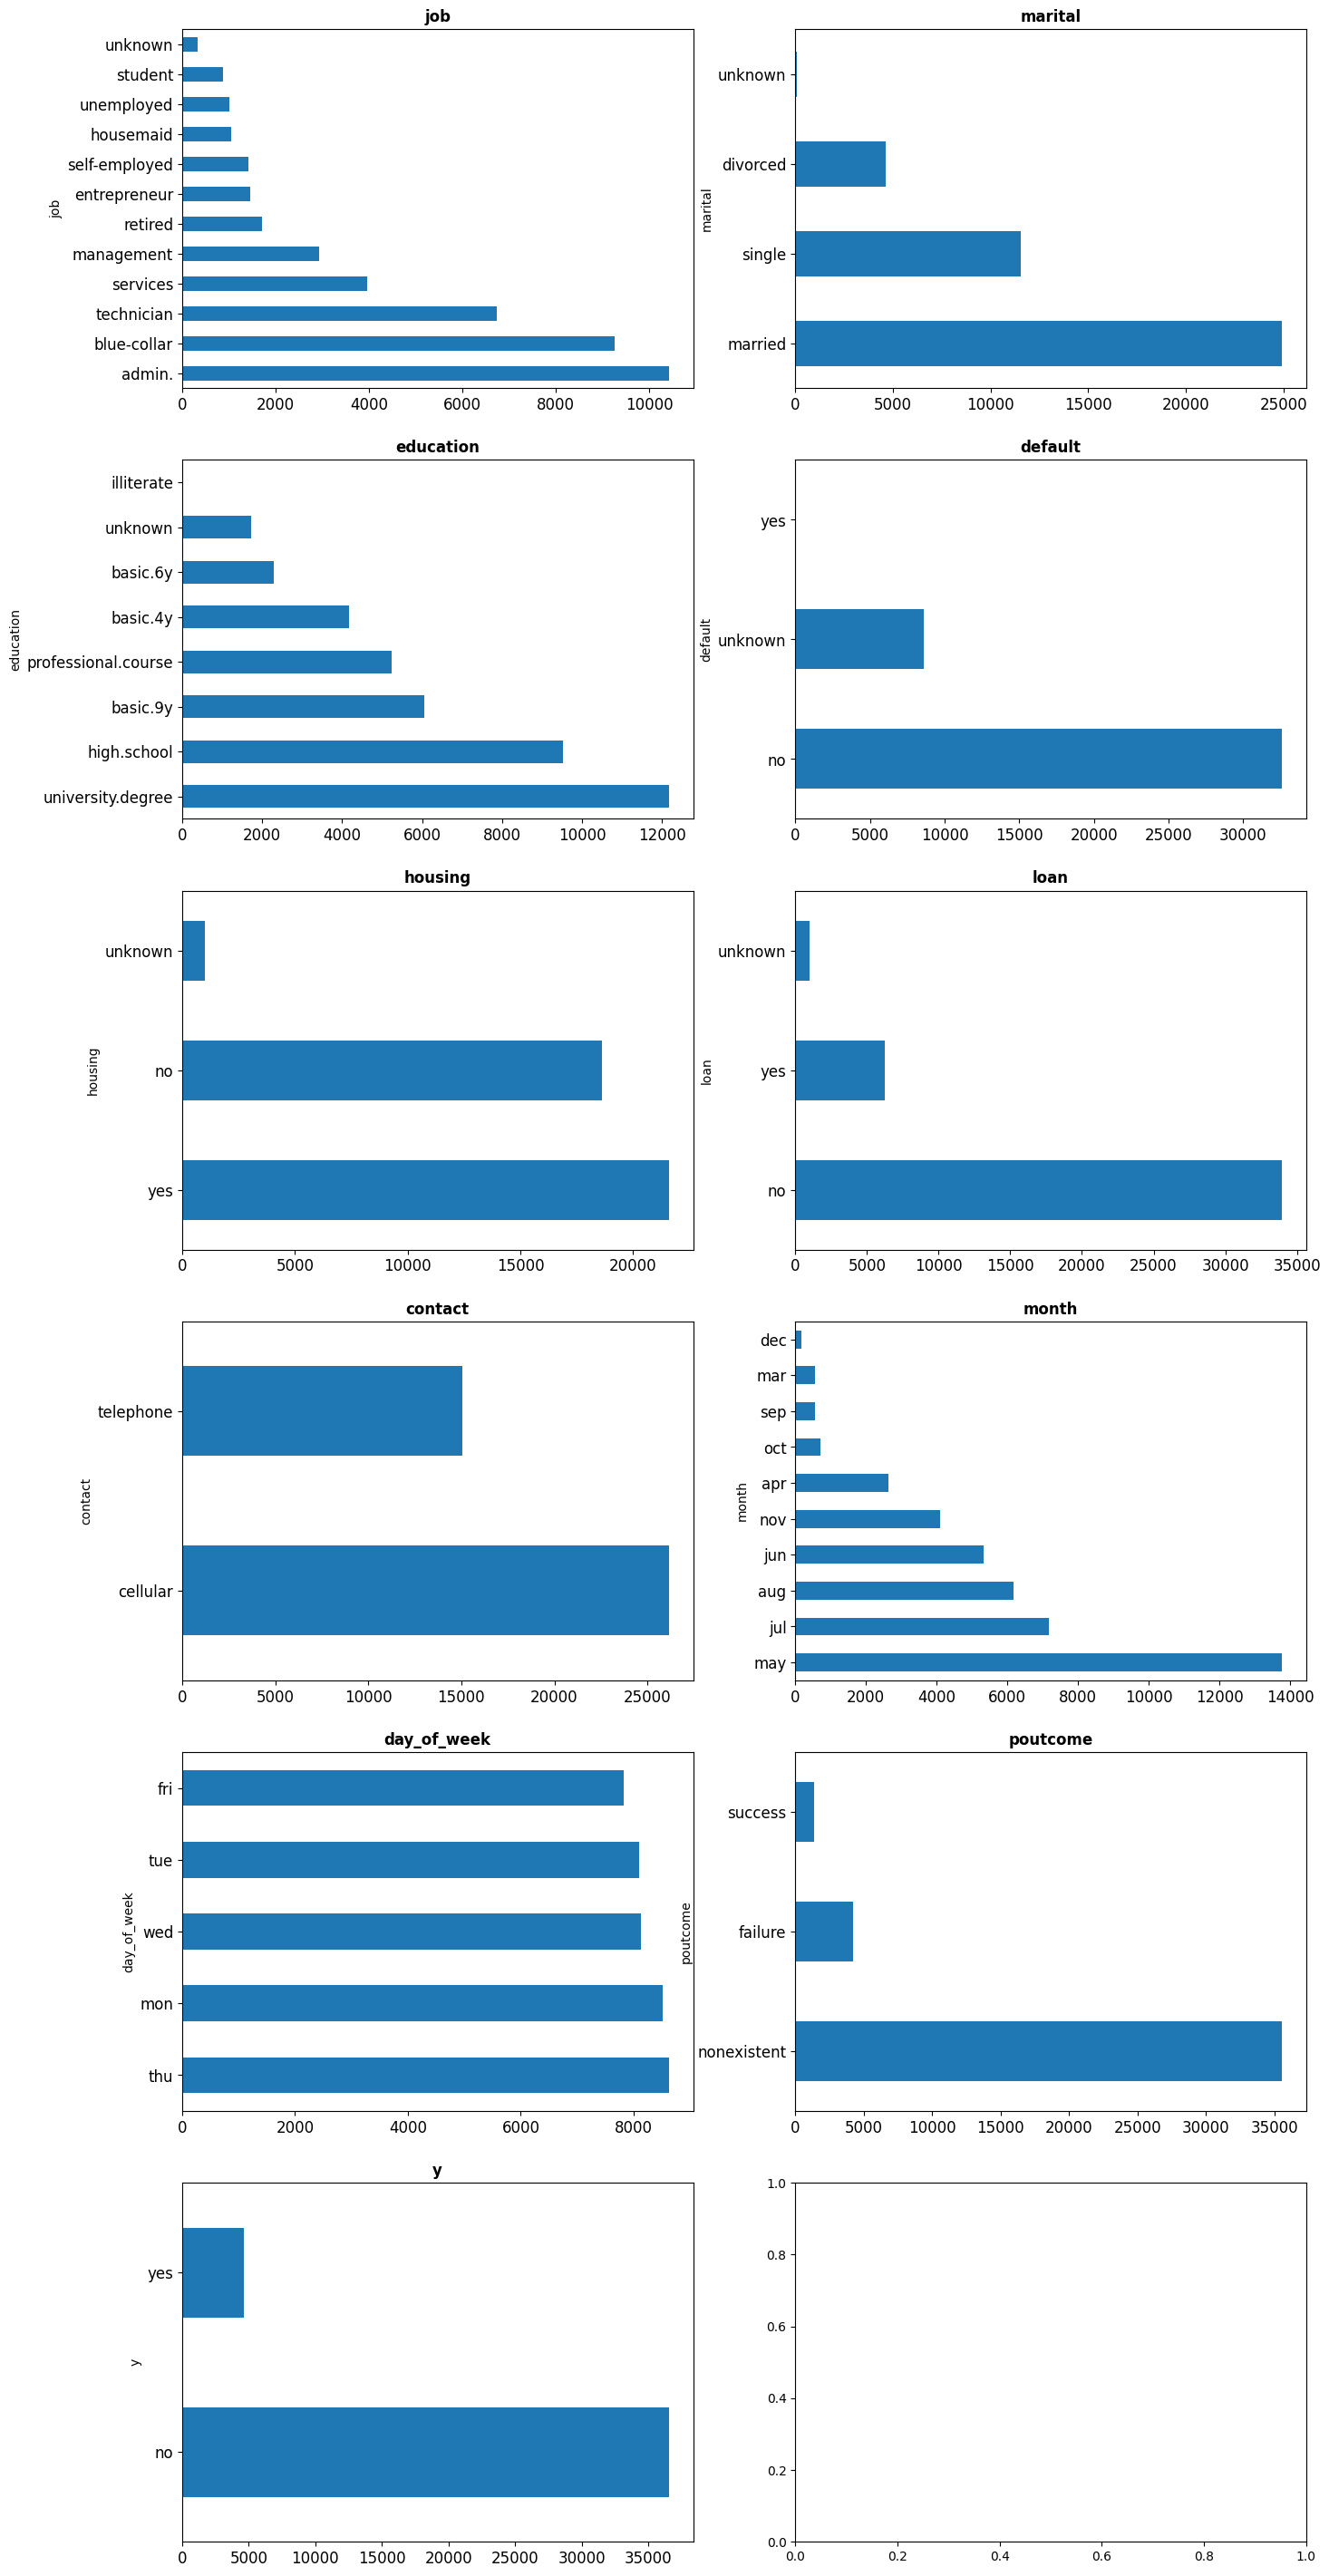

In [20]:
graficos_eda_categoricos(data_df_exp.select_dtypes("O"))

In [22]:
#creamos la funcion para analizar todos nuestras variables categoricas.
def graficos_eda_categoricos_pie(cat):

  #calculamos el numero de filas que necesitamos
  from math import ceil
  filas = ceil(cat.shape[1] / 2)

  #definimos el grafico
  f, ax = plt.subplots(nrows = filas, ncols= 2, figsize = (16, filas * 6))

  #aplanamos para iterar por el grafico como si fuera de 1 dimension en lugar de 2
  ax = ax.flat

  #creamos el bucle que va aniadiendo graficos
  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.pie(ax = ax[cada], autopct='%1.1f%%', startangle=90)
    ax[cada].set_title(variable, fontsize=12, fontweight= 'bold')
    ax[cada].tick_params(labelsize= 12)

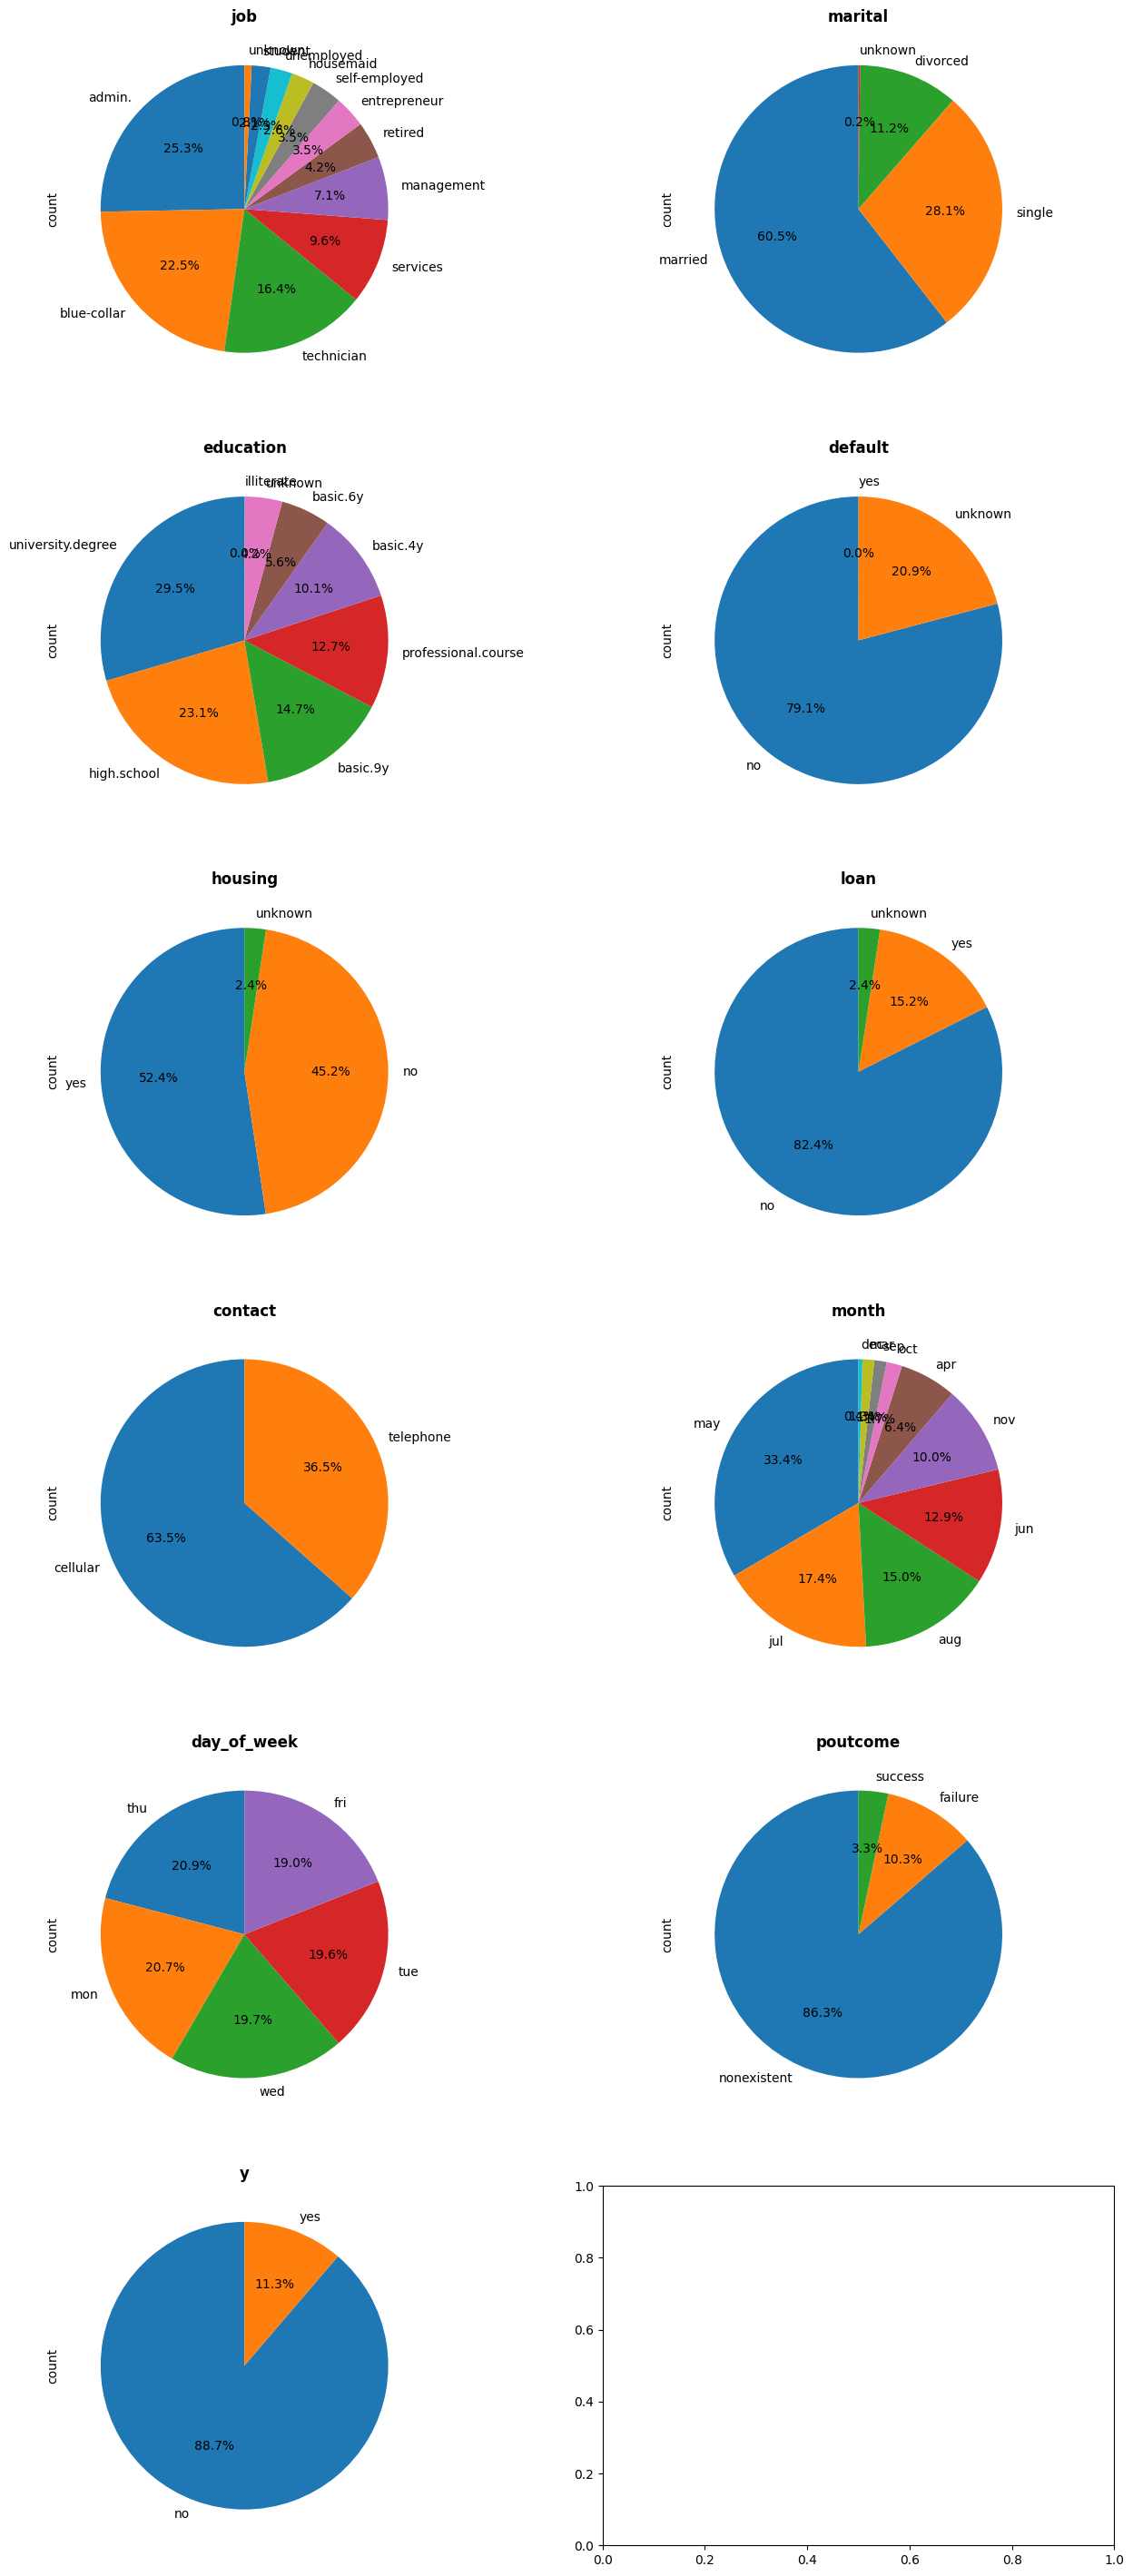

In [23]:
graficos_eda_categoricos_pie(data_df_exp.select_dtypes("O"))

Analisis preliminar 
## Variables categoricas

### Job

- Tipo de trabajo de los clientes

Necesitamos saber la distribucion de cada tipo de trabajo 

- Tenemos una gran cantidad de categorias, pero el  40% se divide en technicia y blue collar por lo que podemos ver que la gran mayoria de los clientes trabaja en sectores de la indusria, 9.6% en servicios y 25.3% en administrativo, siendo este ultimo el de mayor frecuencia. En estas 4 categorias cae el 73.8% de los clientes.

---

- buscamos la relacion de tipo de trabajo con y

### marital

- indica El estado civil

Buscamos distribucion. Tenemos un 60% casados, 28.1% solteros 11.2% divorciados y .2% desconocido. 

---

- relacion con y

### education - Nivel de educacion

- 29.5% poseen un grado universitario
- 23.1% poseen un grado de high school
- 14.7 basico de 9y
- 12.7% un curso profesionl
- el resto se divide en grados menores

---

Relacion con y 

### default -  Credito en incumplimineto

Categorica que indica si los clientes tienen credito en incumplimiento.

79.1% no lo tienen 

20.9% NO SE SABE 

---

- analizar relacion con y

### housing - prestamo de vivienda

52.4% SI tienen un prestamo 

45.2% NO 

---

relacion con y 

### loan - prestamo personal

82.4% No lo tienen 

15.2% Si 

el prestamo personal es una situacion extraordinara en la sociedad por lo que es importante entender porque y tambien tener en cuenta que las personas que si lo tienen puede ser usuarios de credito habituales o simplemente personas cuyas finanzas no les permiten llevar su estilo de vida o personas que estan pasando por situaciones extraordinarias como algo de hospital o algun accidetne/robo. 

---

Analizar contra job, default y marital 

### contact - metodo de contacto

Analizar con y, porque puede ser irrelevante 

---

### month - ultimo mes en que el cliente fue contactado.

analizar contra y para ver si hay un mes con mayor tasa de exito, puede ser posible que en fechas decembrinas o algo por el estilo 

---

### day_of_week - dia en que el cliente fue contactado

Lo mismo que mes, ver si hay un dia con mayor exito de y 

---

### poutcome - Resultado de la campania anterior

es 86% inexistente por lo que es posible que sea irrelevante. 

---

### y - variable objetivo -

El cliente toma el deposito a largo plazo o no lo hace, esta es la que debemos analizar contra todas las demas.

...

In [31]:
#Analisis numerico 
import seaborn as sns
#Funcion de variables numericas .
def graficos_eda_numericas(num):

  #calculamos el numero de filas que necesitamos
  from math import ceil
  filas = ceil(num.shape[1] *2/ 2)

  #definimos el grafico
  f, ax = plt.subplots(nrows = filas, ncols= 2, figsize = (26, filas * 6))

  #aplanamos para iterar por el grafico como si fuera de 1 dimension en lugar de 2
  ax = ax.flat

  #creamos el bucle que va aniadiendo graficos
  for cada, variable in enumerate(num):
        # Histograma
        sns.histplot(num[variable], kde=True, ax=ax[cada * 2])
        ax[cada * 2].set_title(f'Histograma de {variable}', fontsize=12, fontweight='bold')
        ax[cada * 2].tick_params(labelsize=12)

        # Box plot
        sns.boxplot(x=num[variable], ax=ax[cada * 2 + 1])
        ax[cada * 2 + 1].set_title(f'Box Plot de {variable}', fontsize=12, fontweight='bold')
        ax[cada * 2 + 1].tick_params(labelsize=12)


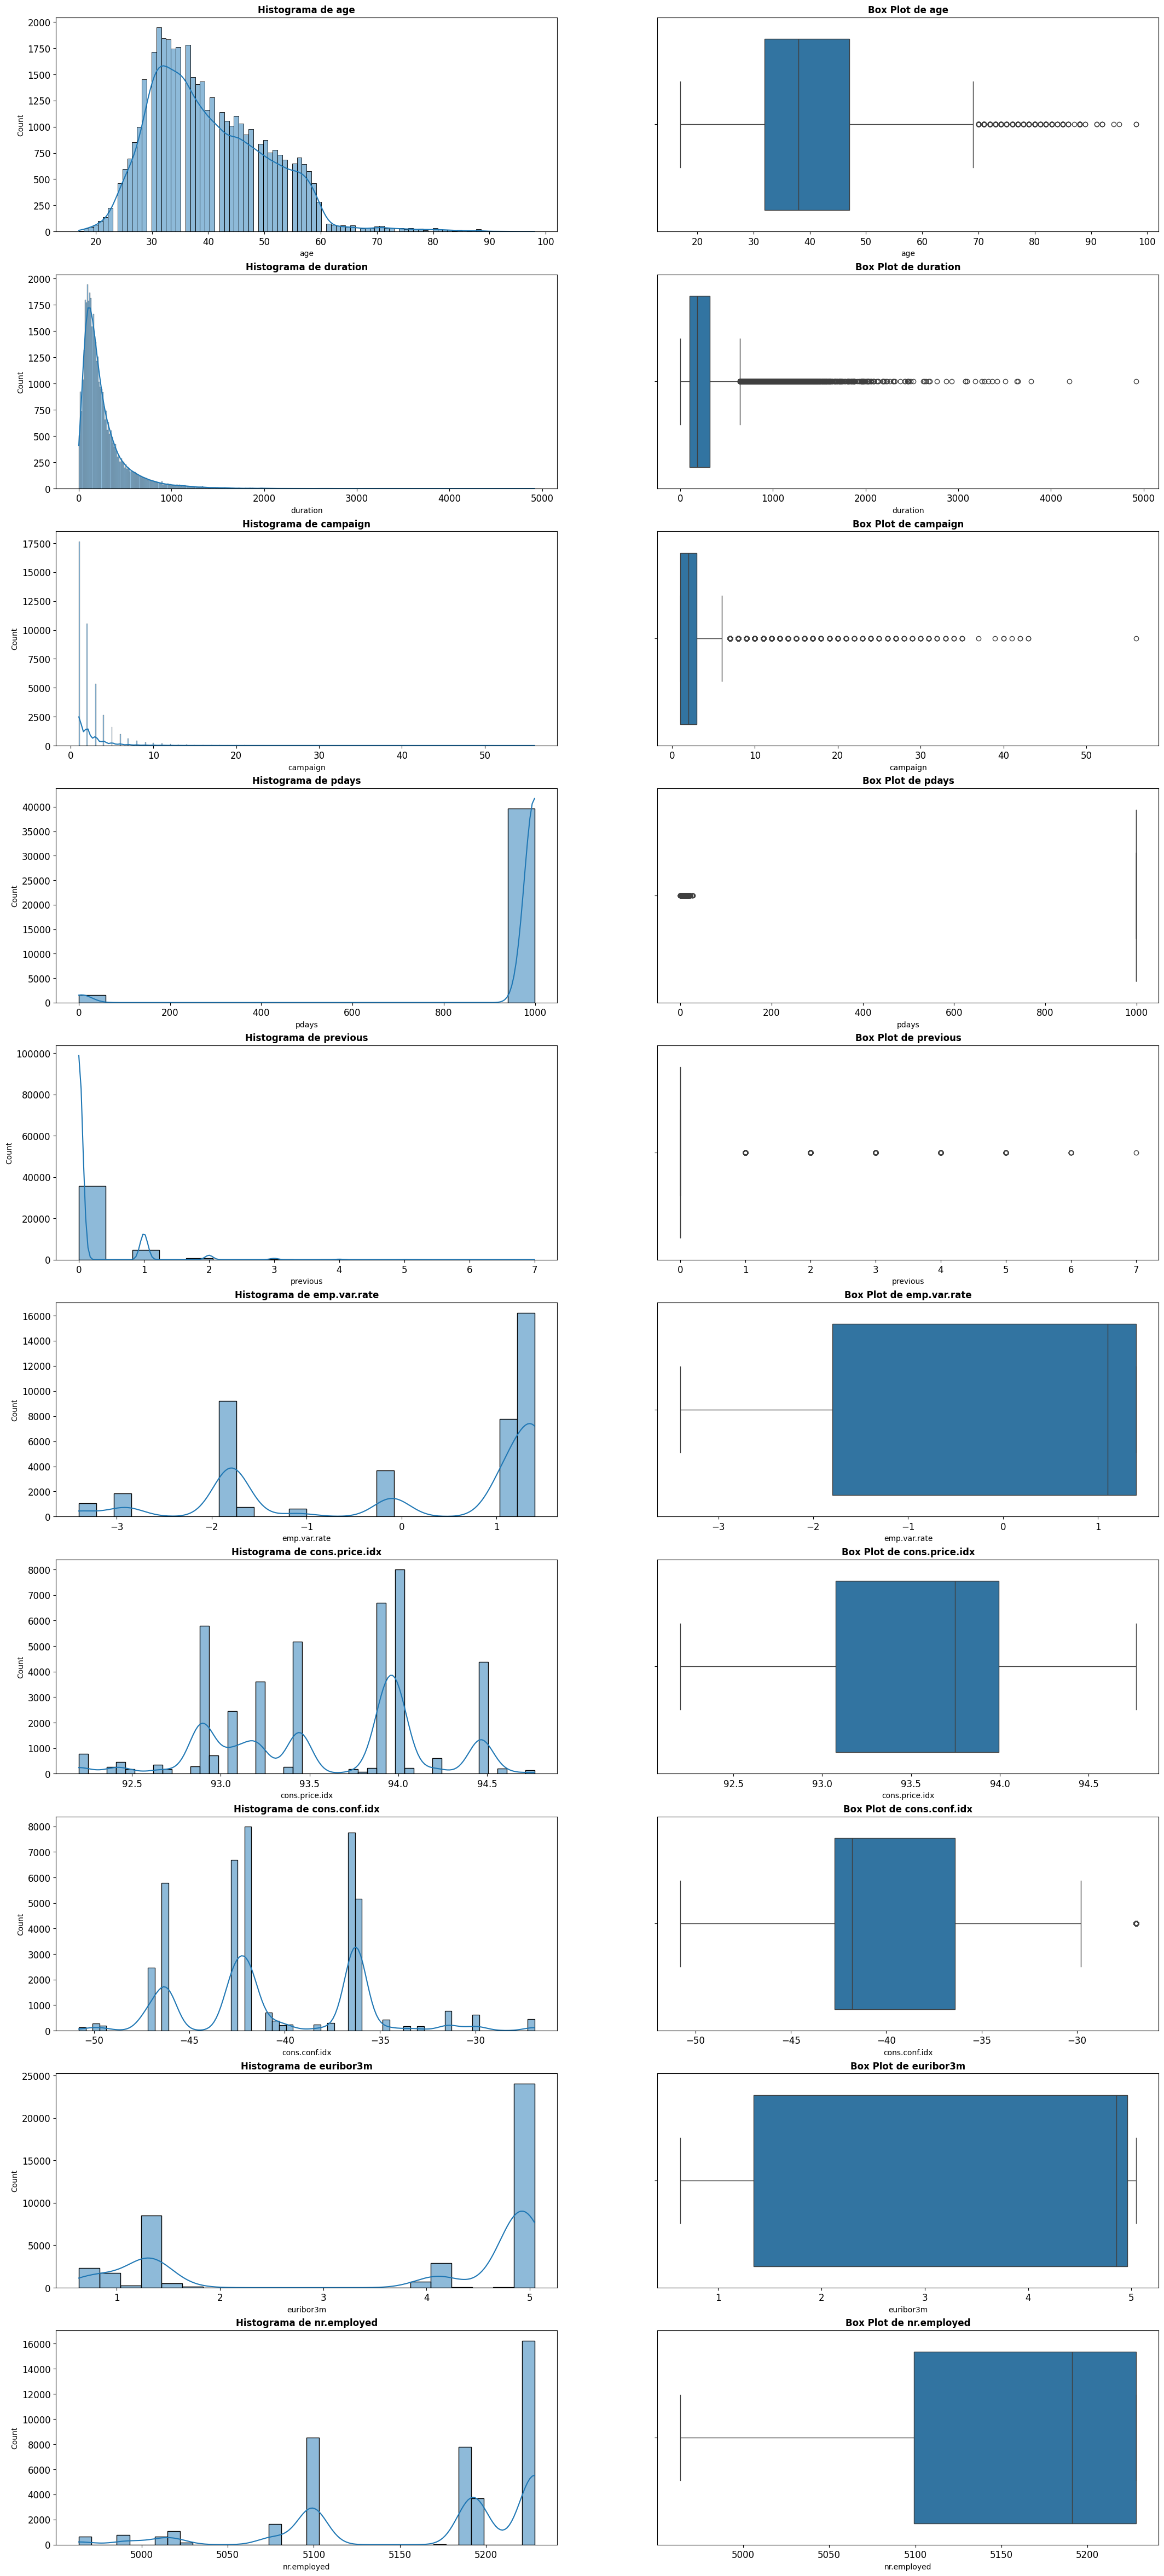

In [32]:
graficos_eda_numericas(data_df_exp.select_dtypes(["int64", "float64"]))

In [34]:
data_df_exp.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Variables Numericas

### Age - la edad de los clientes

Buscamos saber que edad de clientes es mas propensa a tomar un deposito a largo plazo. Y

Vemos una distribucion con valores mas altros entre 30 y 35. 

Tendremos un minimo de 18, maximo de 70 y  outliers que no se van a eliminar por ahora 

Un rango intercuartil entre 30 y 50 anios. el 25 a 75% de los datos. y una mediana aproximada a los 40 pero sin llegar. 

Vemos el grueso de los datos entre 25 y 60 Total

---

Analizar relacion con y 

### Duration - Duracion del contacto anterior en segundos

Es probable que entre mayor dure el contacto mayor sea la tasa de aceptacion del deposito. de cualquier forma esto nos puede dar una alta correlacion pero no necesariamente una casua, debido a que tiene sentido que una persona interesada en el deposito hable mas tiempo que una que no lo esta. de cualquier forma si podemos encontrar la forma de hacer que el contacto dure mas tiempo podemos empezar con entender si este alargamiento en el tiempo de contacto resulta en una mayor tasa de aceptacion en clientes que incialmente no estan interesados. 

- A mayor duracion mayor aceptacion??

---

Analizar impacto en Y 

### campaing - numero de contactos realizados durante esta campania al cliente

## Importante (y)

En la distribucion vemos una cantidad relativamente baja, con maximos y minimos estadisticos que van de 1 a menos de 10, los outliers llegan hasta los 75 aproximadamente. 

---

numero de contactos que da la mayor cantidad de aceptacion ?? 

Es relevante?? probablemente no, o en caso de serlo puede ser un numero bajo de clientes que ya estaban interesados. 

### pdays - numero de dias transcurridos desde la ultima campania hasta que el cliente fue contactado.

tenemos practicamente 2 categorias o grupos de categorias, en una tenenemos entre 0 y aprox 25 dias y en la otra entre 975 y 1000 dias. la gran mayoria cae en los 1000 dias por lo que parece ser una situacion de lineamiento de tiempo. es probale que sea irrelevante pero analizaremos con y para ver correlacion 

---

Analizar con y 

### previous- numero de contactos realizados durante la campania anterior al cliente.

Lo mismo que campaign pero en la campania anterior

---

Analizar campaign y previous contra y para ver si cualquiera tiene correlacion y daber el numero de contactos eficiente 

### emp-var-rate - indica la tasa de variacion de empleo en el trimestre en el que los datos fueron registrados

Un valor positivo indica crecimiento en el empleo y un valor negativo indica mayor desempleo. 

Tendremos a la mayor frecuencia entre el -2% y el 1.5% distribuyendo a la gran mayoria de los datos dos categorias una alrededor de -2 y otra un poco arriba de 1%.

---

Analizar como el desempleo afecta la aceptacion de depositos 

### cons.price.idx- nos da el indicador mensual de indice de precios al consumidor.

cambios en el precio de la canasta basica, es un indicador clave de la inflacion.

Una inflacion alta significa que los consumidores quieren depositos que rindan un interes de retorno mayor a la inflacion, de igual forma una tasa MUY ALTA causa desconfianza y los consumidores prefieren tener su dinero liquido. 

- los valores de 93 significan que comparado con el anio base los precios han caido en un 7%.

---

Analizar como la inflacion afecta a y 

### cons.conf.idx - indice de confianza del consumidor indicador mensual

Es la confianza que tiene la poblacion en general sobre el estado de la economia, un valor alto indica optimismo un valor bajo pesimismo. 

---

Ver relacion con y 

### euribor3m - Tasa euribor a 3 meses indicador diario

Euro interbank offered rate es una tasa de interes promedio a la cual los bancos europeos se prestan dinero ente si. Es para productos financieros. 

Tasa baja en euribor hace que el interes de los depositos a largo plazo no sean atractivos debiido al bajo rendimiento y viceversa, ya que a mayor interes mayor rendimiento. 

### nr.employed - numero total de personas empleadas en la economia.

Indica la salud del mercado laboral. 

a mayor numero de empleados mejor estabilidad y salud den la economia, tambien tendremos una gran correlacion con la tasa de desempleo, es probale tener que analizar cada una de ellas para determinar si debemos eliminar una para evitar que el modelo lo tome como una variable de peso doble.

Analisis de variables contra la variable objetivo.

In [39]:

def categorica_vs_target(df, target_var, cat_vars):
    
    num_vars = len(cat_vars)
    filas = (num_vars + 1) // 2
    
    # Definir el tamaño de la figura
    fig, axes = plt.subplots(filas, 2, figsize=(26, filas * 15))
    axes = axes.flatten()
    
    for i, var in enumerate(cat_vars):
        sns.countplot(data=df, x=var, hue=target_var, ax=axes[i])
        axes[i].set_title(f'{var} vs {target_var}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(var, fontsize=10)
        axes[i].set_ylabel('Count', fontsize=10)
        axes[i].tick_params(labelsize=10)
        axes[i].legend(title=target_var)
    
    # Si hay más subplots que variables, eliminar los subplots sobrantes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()



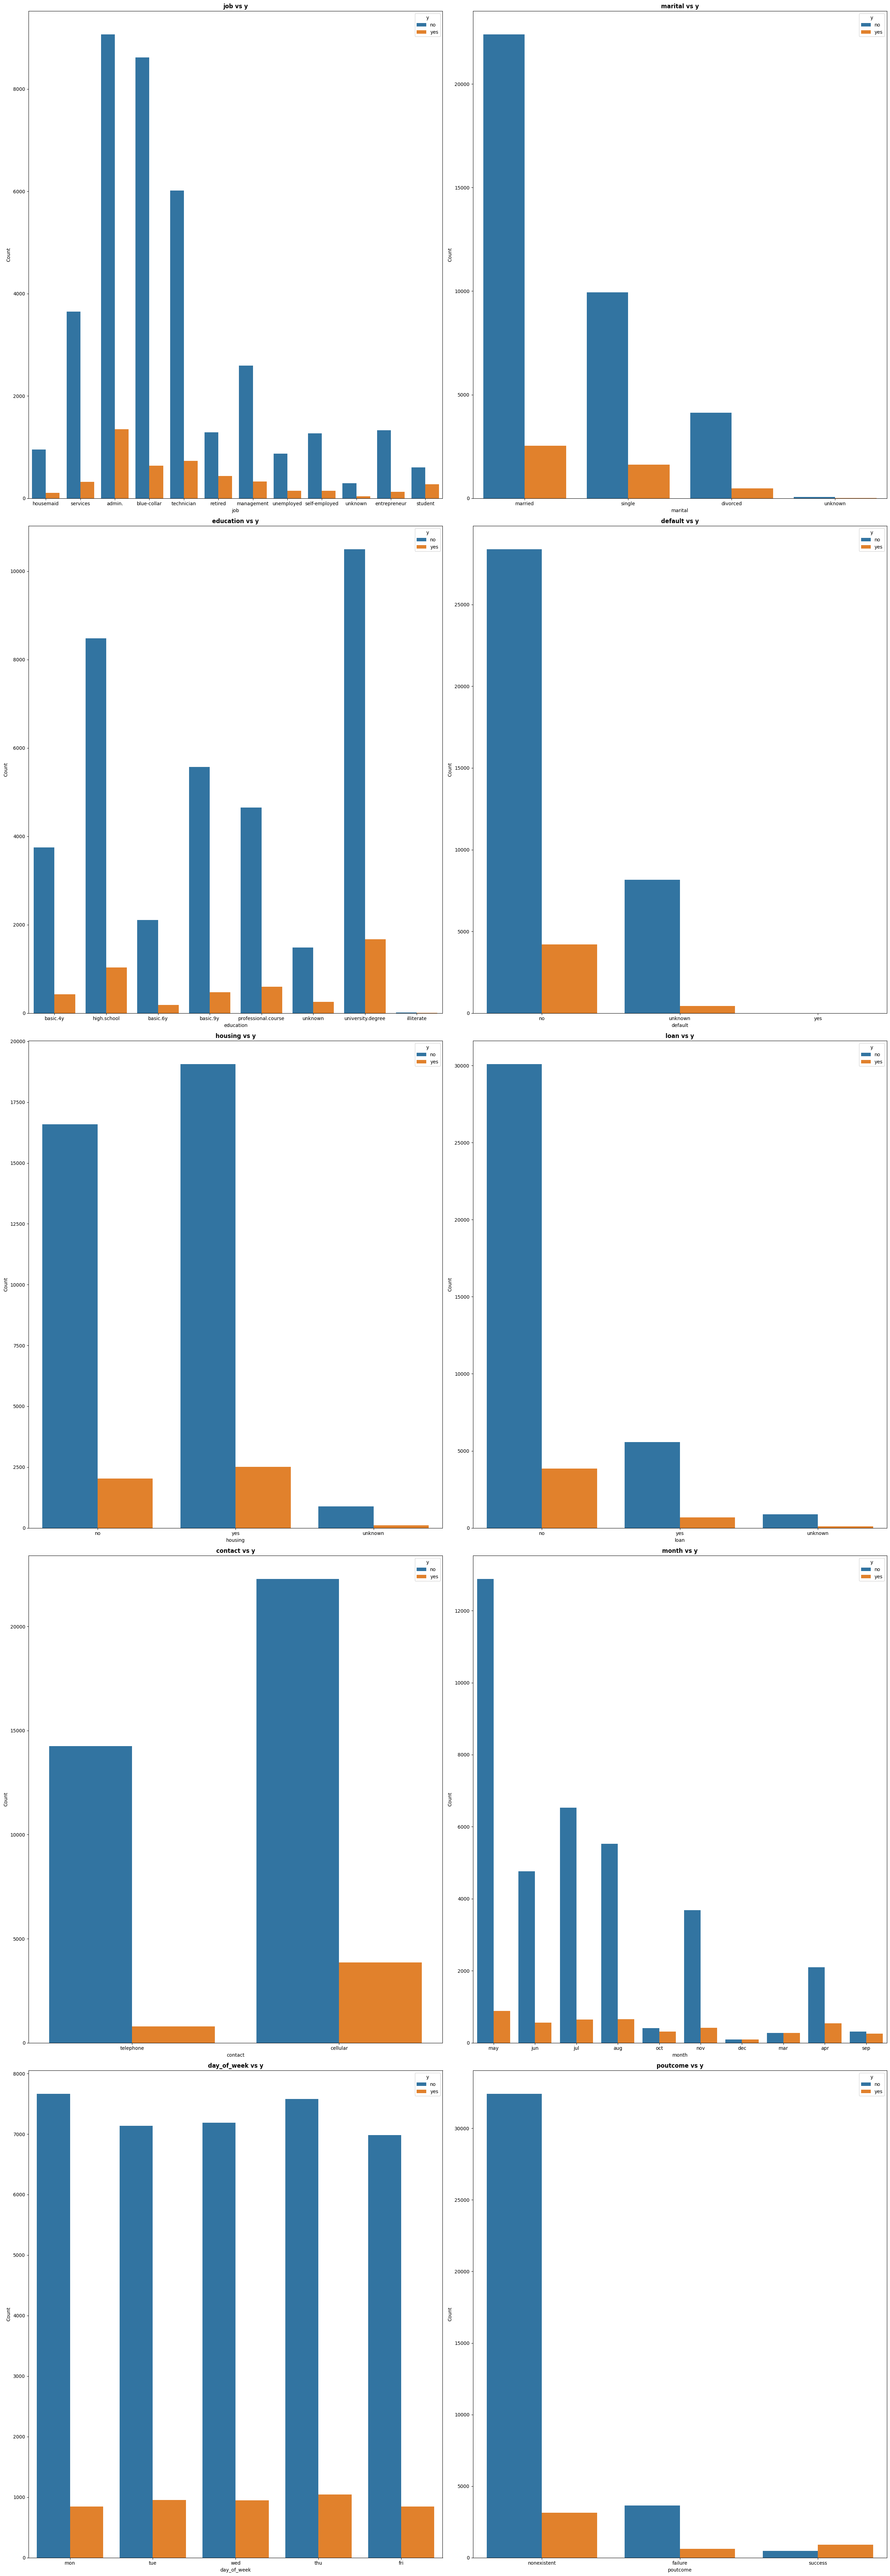

In [40]:

cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


categorica_vs_target(data_df_exp, 'y', cat_vars)

In [57]:

def categorica_vs_target(df, target_var, cat_vars):
    num_vars = len(cat_vars)
    filas = (num_vars + 1) // 2
    
    # Definir el tamaño de la figura
    fig, axes = plt.subplots(filas, 2, figsize=(26, filas * 6))
    axes = axes.flatten()
    
    for i, var in enumerate(cat_vars):
        # Calcular los porcentajes
        df_agg = df.groupby(var)[target_var].value_counts(normalize=True).unstack()
        
        # Reordenar las columnas si no existen ambos valores
        if 'no' not in df_agg.columns:
            df_agg['no'] = 0.0
        if 'si' not in df_agg.columns:
            df_agg['si'] = 0.0
        
        # Graficar los porcentajes
        ax = df_agg.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f'{var} vs {target_var}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(var, fontsize=10)
        axes[i].set_ylabel('Percentage', fontsize=10)
        axes[i].tick_params(labelsize=10)
        axes[i].legend(title=target_var)
        
        # Agregar etiquetas de porcentaje en cada barra
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height:.0%}', (x + width / 2, y + height / 2), 
                        ha='center', va='center', fontsize=12, color='white')
       
    
    # Si hay más subplots que variables, eliminar los subplots sobrantes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


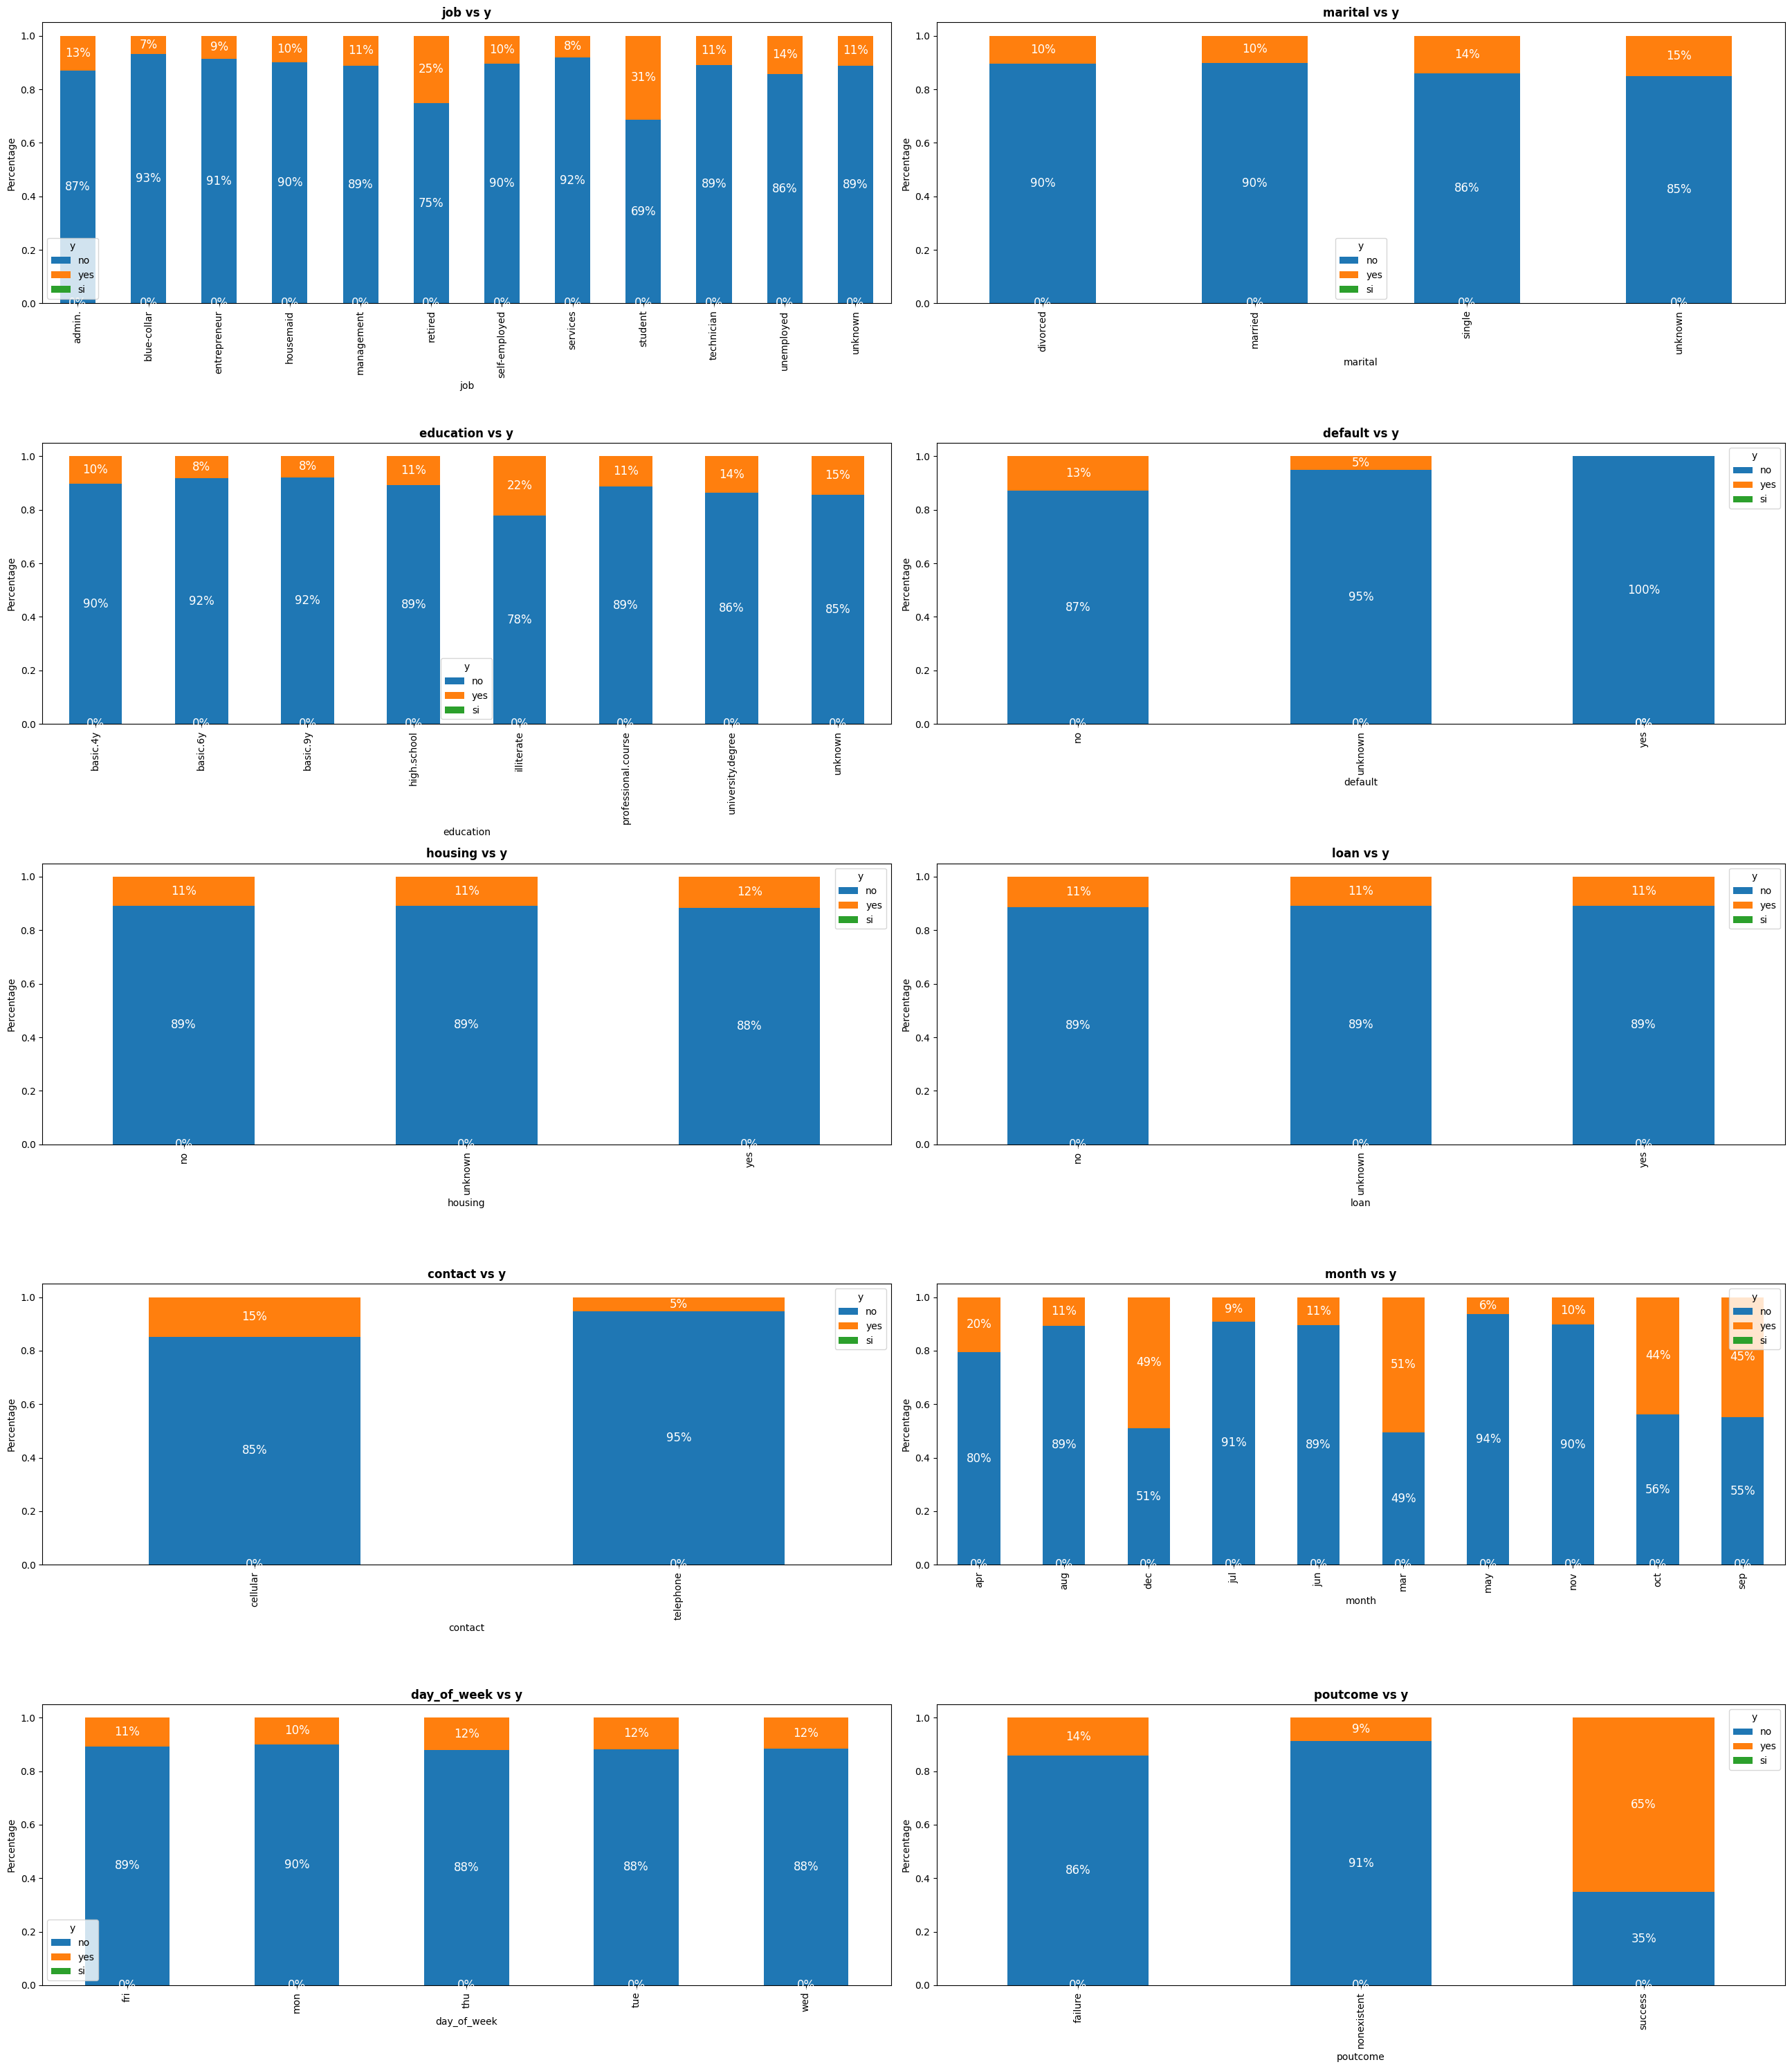

In [58]:

cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


categorica_vs_target(data_df_exp, 'y', cat_vars)

# Analisis de variables categoricas vs variable objetivo

### Job - Tipo de trabajo

Mientras que blue collar y admin son los dos tipos de trabajo con mayor frecuencia. en cuestion de aceptacion veremos varias cosas:

- Admin es la que mayor cantidad tiene pero tambien es la que mayor cantidad tiene en general, le sigue blue collar y technician.
- En cuestion de porcentaje retired y student son las que mas porcentaje tienen con 25 y 31% respectivamente, opuesto a blue collar que solo tiene 7% y services con 8%. Blue collar especificamente es una porcion grande de los clientes con 22.5% pero de esos solo el 7% dice que si, por lo que en cuestion de potenciales aceptaciones tendremos que considerar mucho mas a admin ya que el doble de porcentaje acepta y posee una porcion mas grande de los clientes.

### marital

Casados es la que mas aceptaciones tiene en numeros duros, pero esto se debe que casados es un 60% de todos los clientes, por lo que  esto no indica que un cliente casado sea mas probable de tomar un deposito a largo plazo, solo que hay mas de ellos 

- de hecho el porcentaje de aceptacion de casado y divorciado es el mismo 10% mientras que de soltero es 4% mayor.

### education

La porcion de poblacion que mas toma los depositos son iliterate con 22% del total aceptandolo, sin embargo estos no toman una gran parte de la poblacion total de clientes, por lo que queda descartado como indicador, ya que es menos del 1% de la poblacion total. 

Nos iremos con que el 14% de las personas con grado universitario si aceptan el deposito. 

### default

Las personas que no tienen un credito en incumpliemento son mas propensas a tomar un deposito a largo plazo, esto tiene sentido ya que es un indicador de una economia personal estable. 

### housing

Aquellos que si tienen un prestamo de casa son ligeramente mas propensos a tomar un deposito a largo plazo. 

### loan

Aquellos que tienen un prestamo personal son mucho menos propensos a un deposito de largo plazo, lo cual hace sentido debido a que este tipo de prestamos comunmente indican una inestabilidad economica y una alta necesidad de tener fondos de forma liquida a corto plazo. 

### contact

Sorprendentemente Las personas que son contactadas por celular aceptan el deposito muho mas que las personas que son contactadas por telefono (el triple) esto se debe a dos factores, el primero es que el doble de personas fueron contactadas por celular en lugar de telefono, pero es importante entender que la aceptacion aun asi es mucho mayor en porcentaje por lo que LAS PERSONAS DEBEN SER CONTACTADAS POR CELULAR Y NO POR TELEFONO. 

### month

los meses de ultimo contacto con mas frecuencia son mayo, julio, agosto y junio, sin embargo los meses en los que hubo una mayor aceptacion en cuestion de porcentaje son marzo, diciembre, septiembre y octubre, por lo que debemos tener en cuenta si es mejor contactar a los clientes en estos meses. 

### day of week

La tasa de aceptacion es practicamente constante, asi como la cantidad de llamadas en cada uno, siendo esta una variable que tiene un cambio minimo, decidimos descartarla ya que su comportamiento se acerca a ser constante. 

### poutcome

La tasa de exito fue muchisimo mayor en aquellas personas que ya habian aceptado una promocion anteriormente siendo del 65%, mientras que las que lo habian rechazado tienen el 14 y los que no fueron contactados antes tienen 9 por lo que sabremos que quiene ya aceptaron otras campanias son mas propensos a aceptar de nuevo debido a los resultados positivos.

In [59]:
#eliminamos la columna cuyos valores son cuasi constantes
data_df_exp.drop(columns='day_of_week', inplace=True)

In [60]:
data_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

Analisis de variables numericas contra la variable objerivo 

In [61]:
def plot_violin_plots(df, target_column):
    
    numeric_columns = df.select_dtypes(include=['number']).columns

    
    for col in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.violinplot(x=target_column, y=col, data=df)
        plt.title(f'Violin Plot of {col} by {target_column}')
        plt.show()

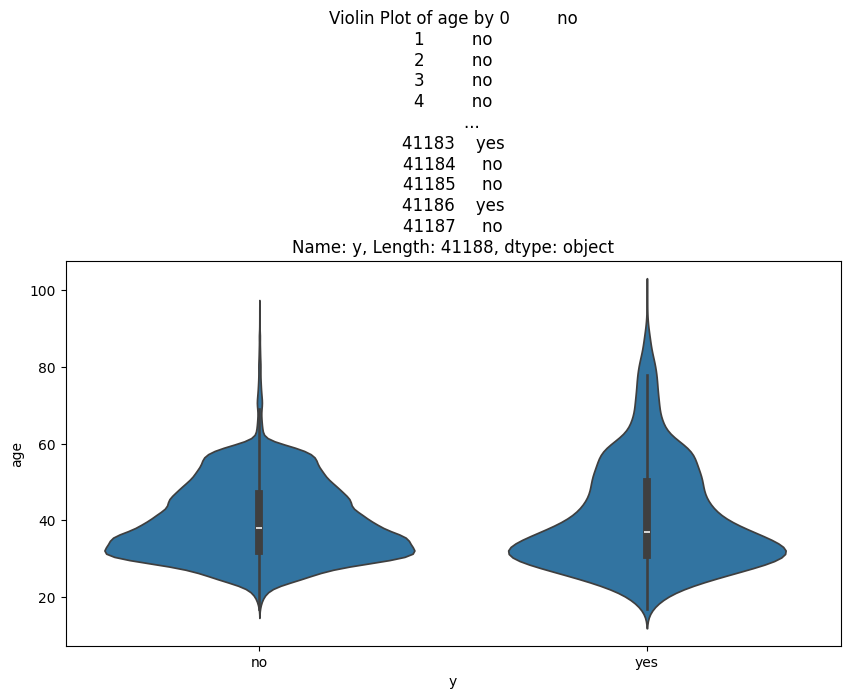

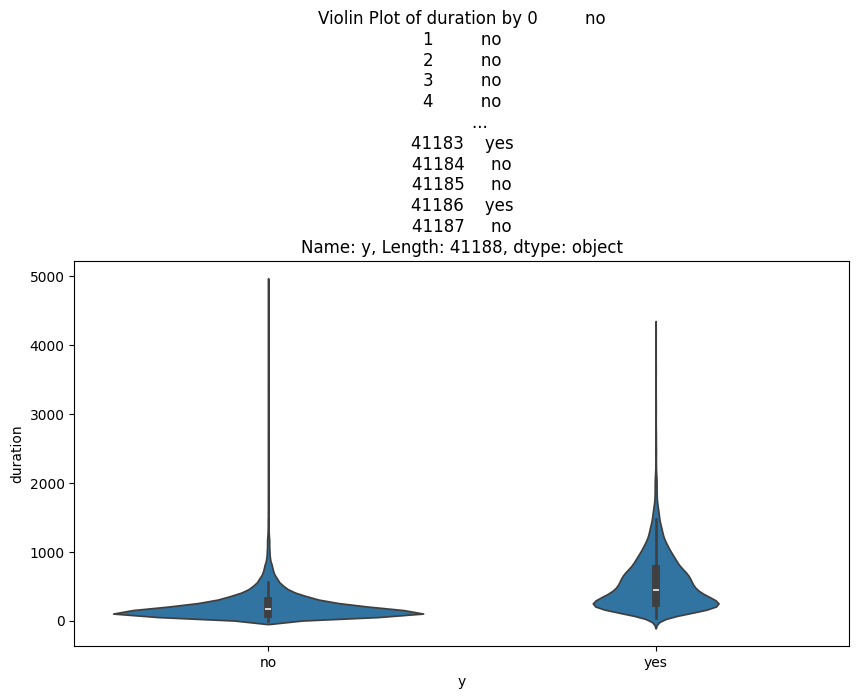

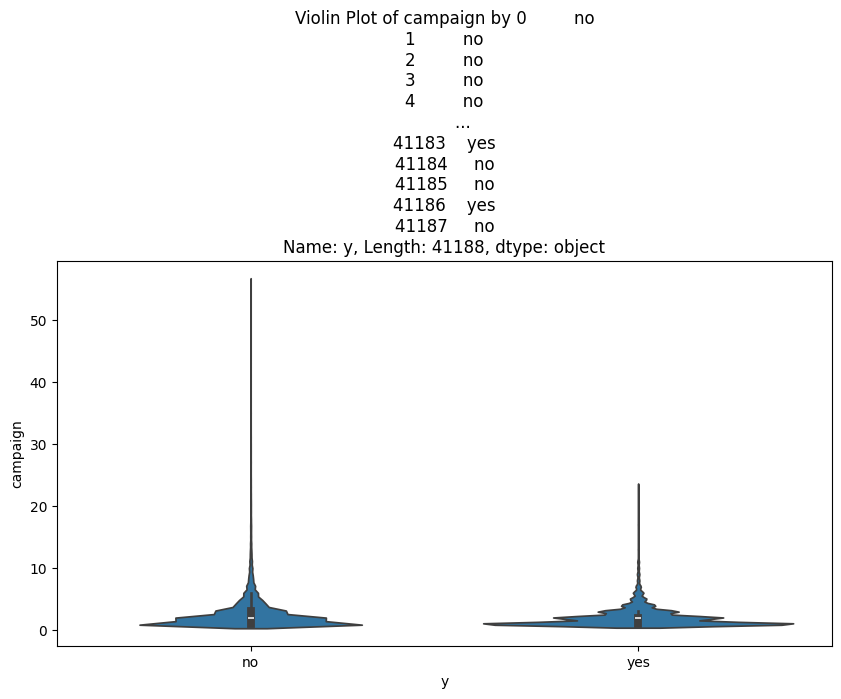

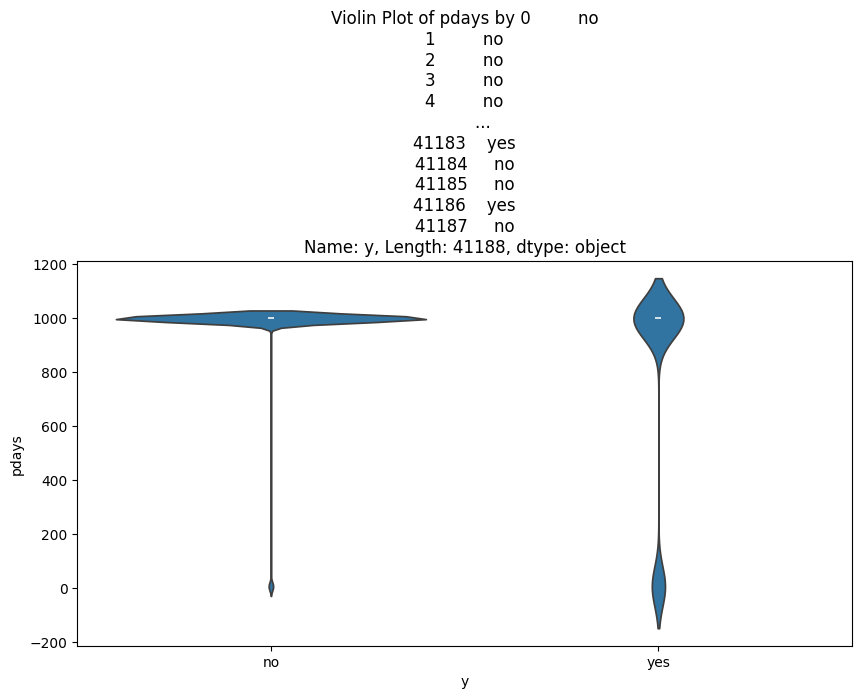

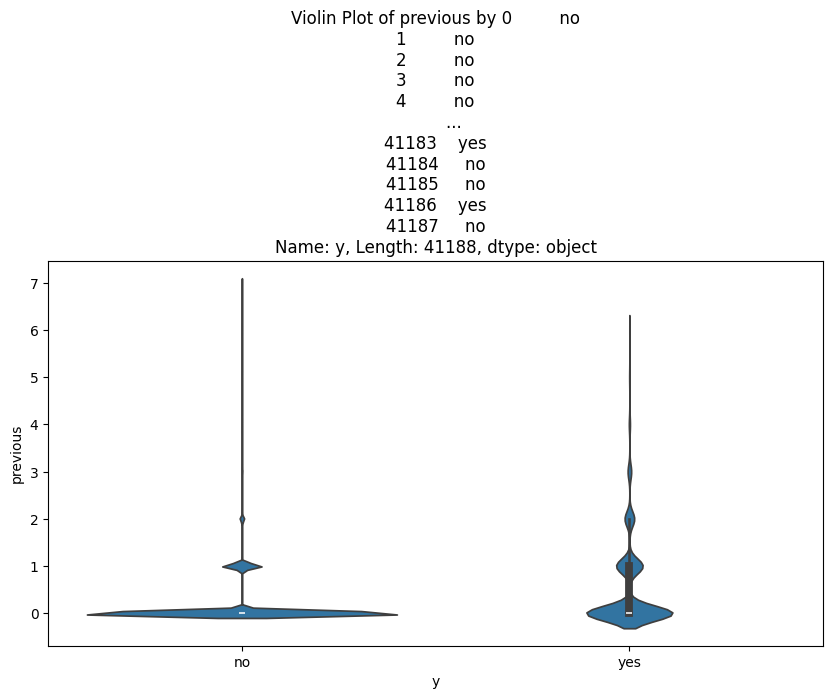

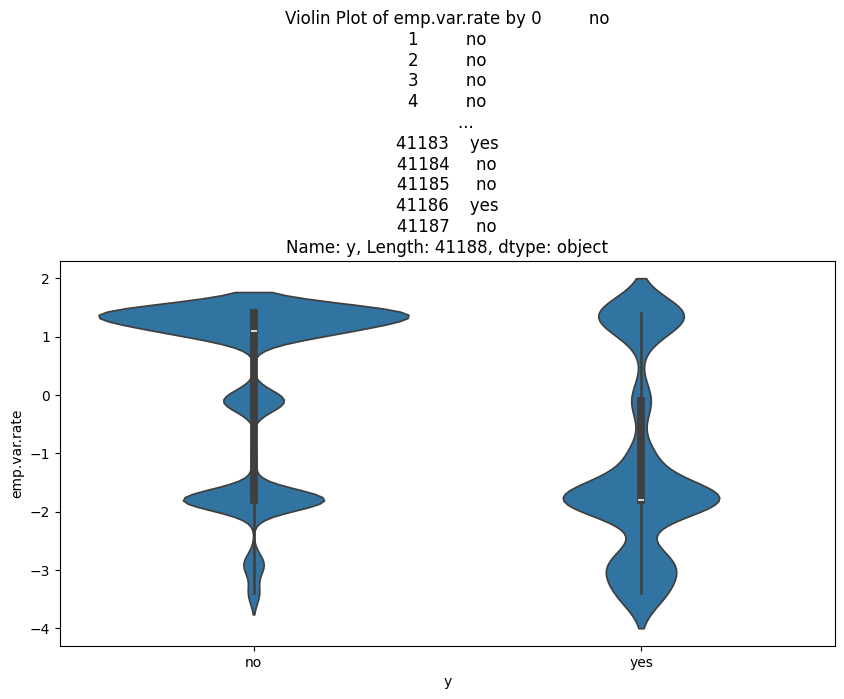

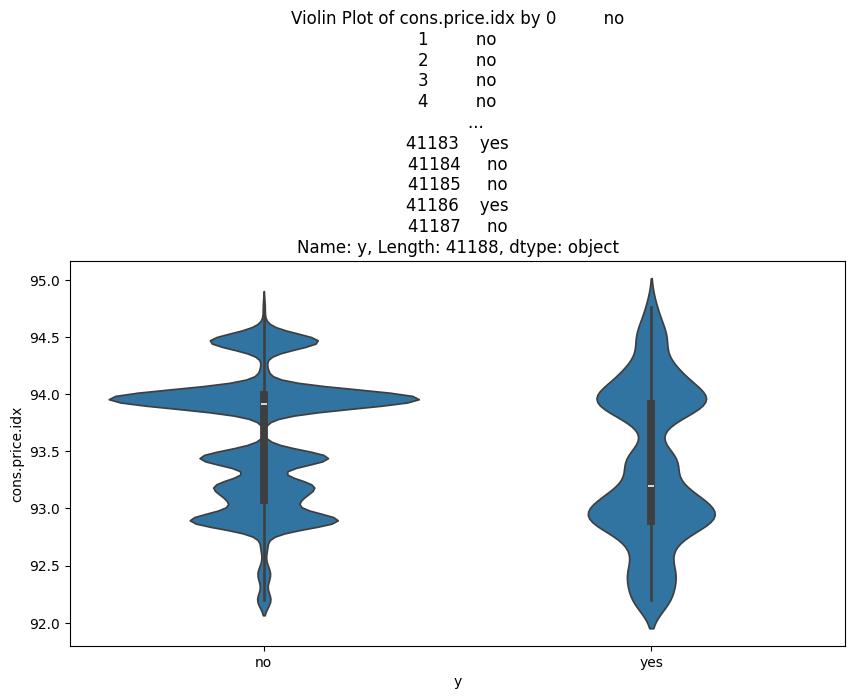

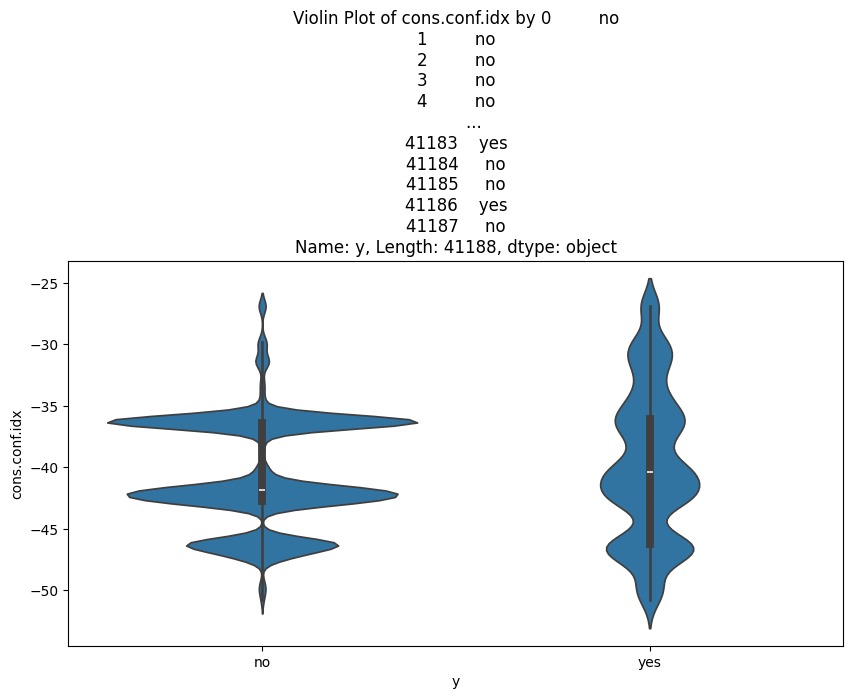

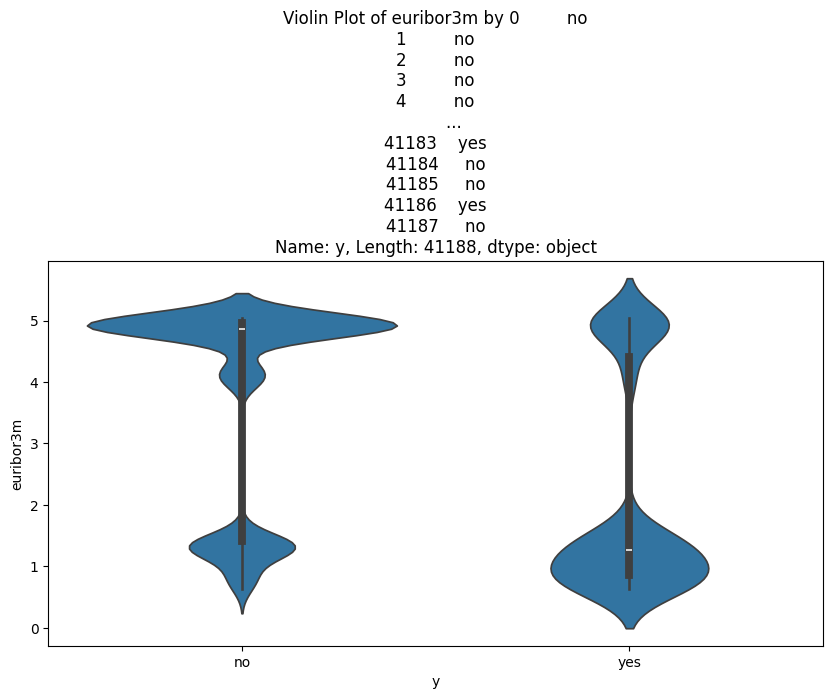

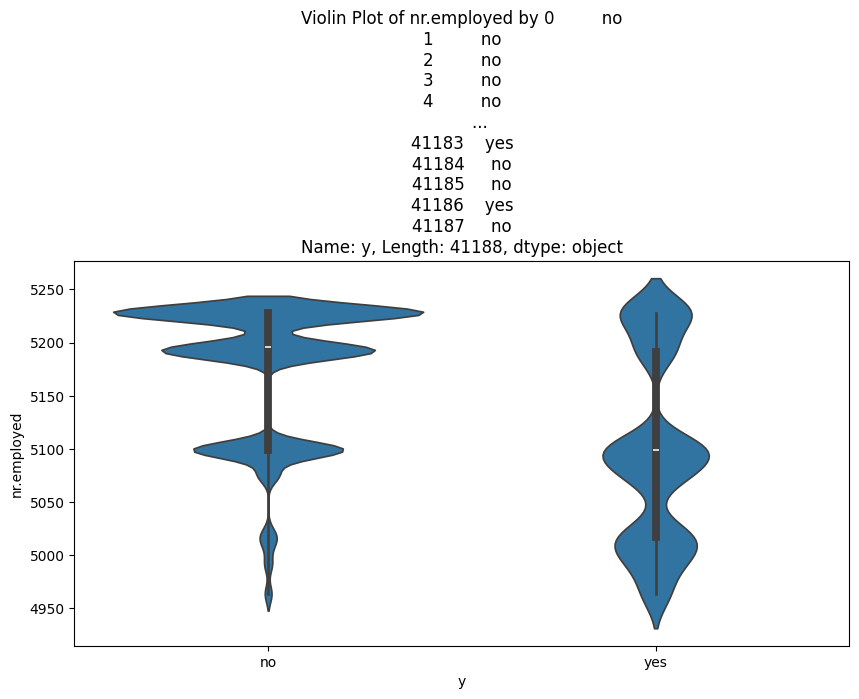

In [62]:
plot_violin_plots(data_df_exp, data_df_exp.y)

In [66]:


def plot_box_plots(df, target_column):

    numeric_columns = df.select_dtypes(include=['number']).columns

    for col in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=target_column, y=col, data=df)
        plt.title(f'Box Plot of {col} by {target_column}')
        plt.show()



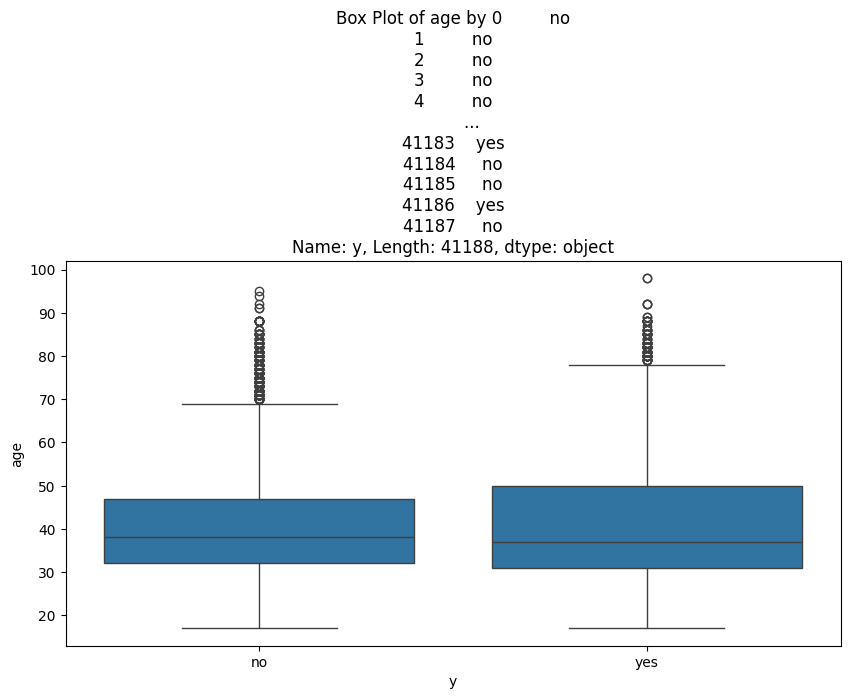

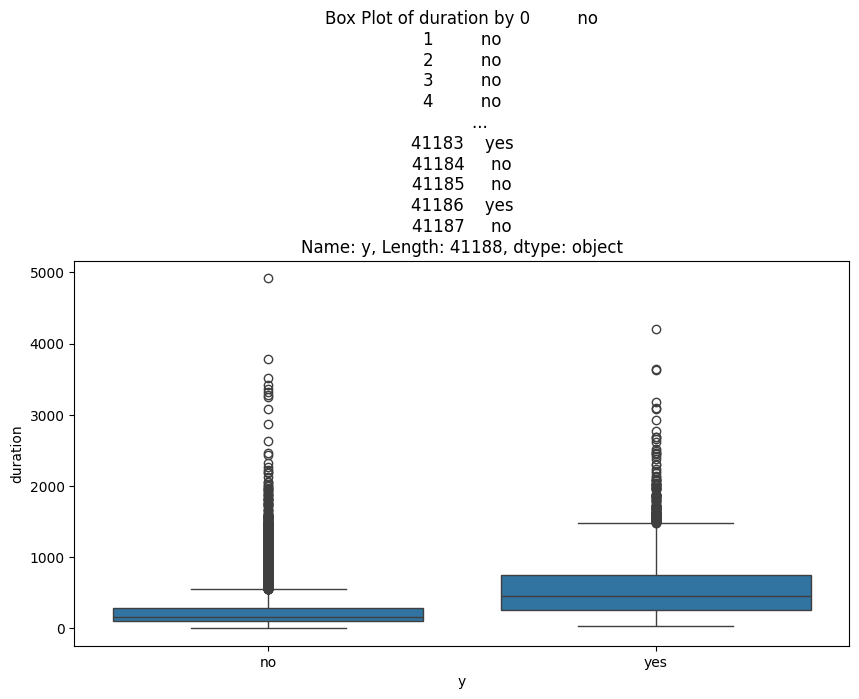

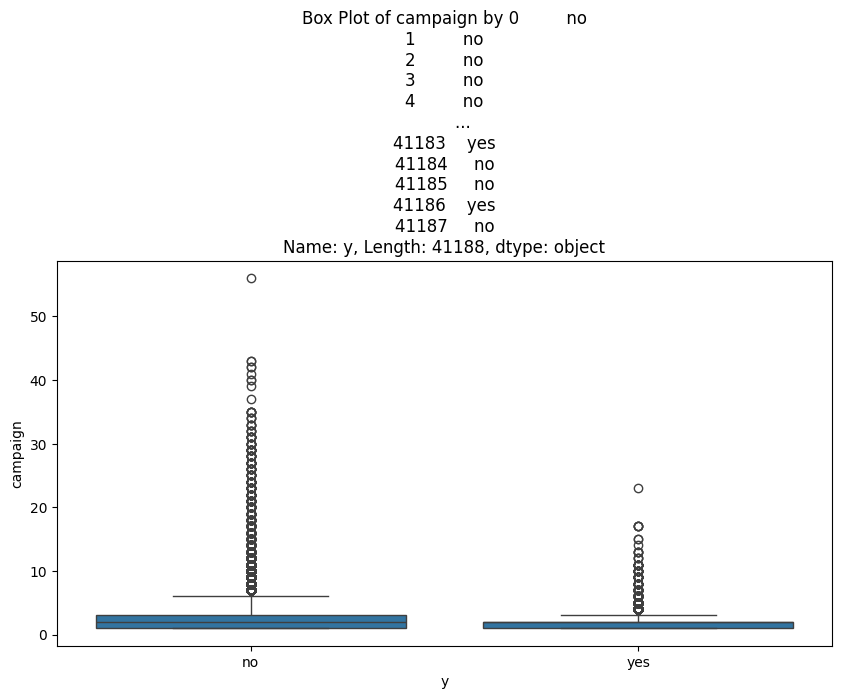

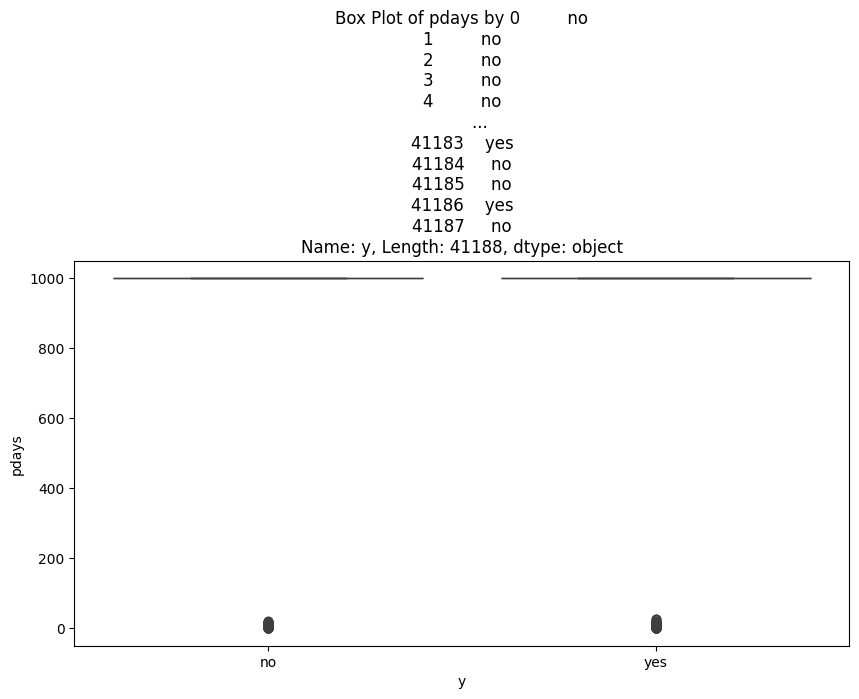

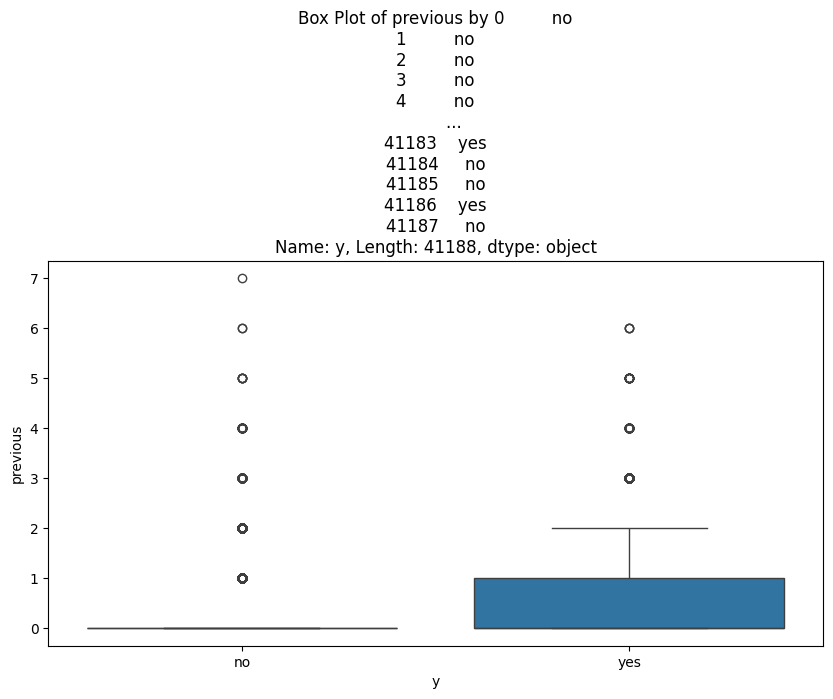

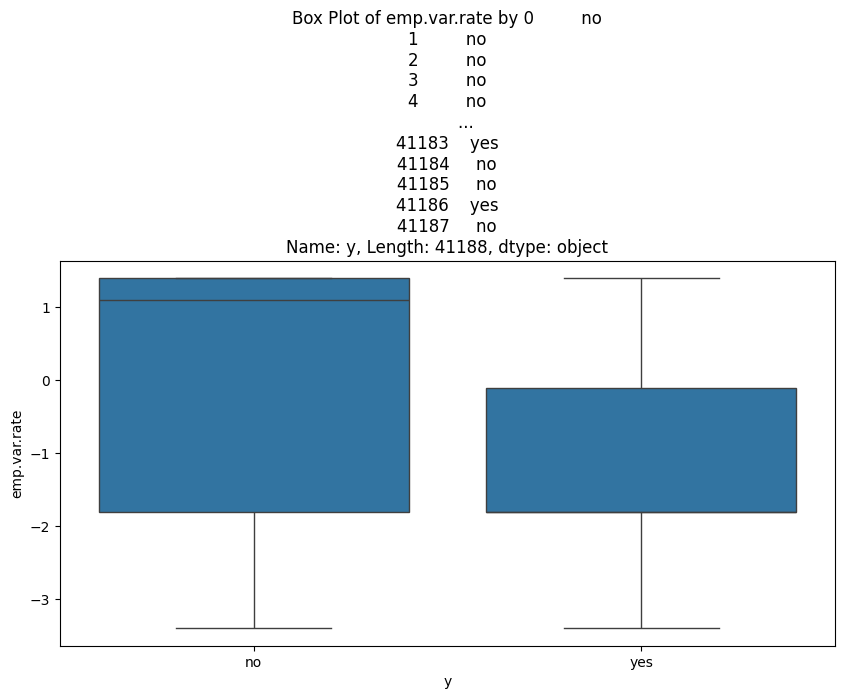

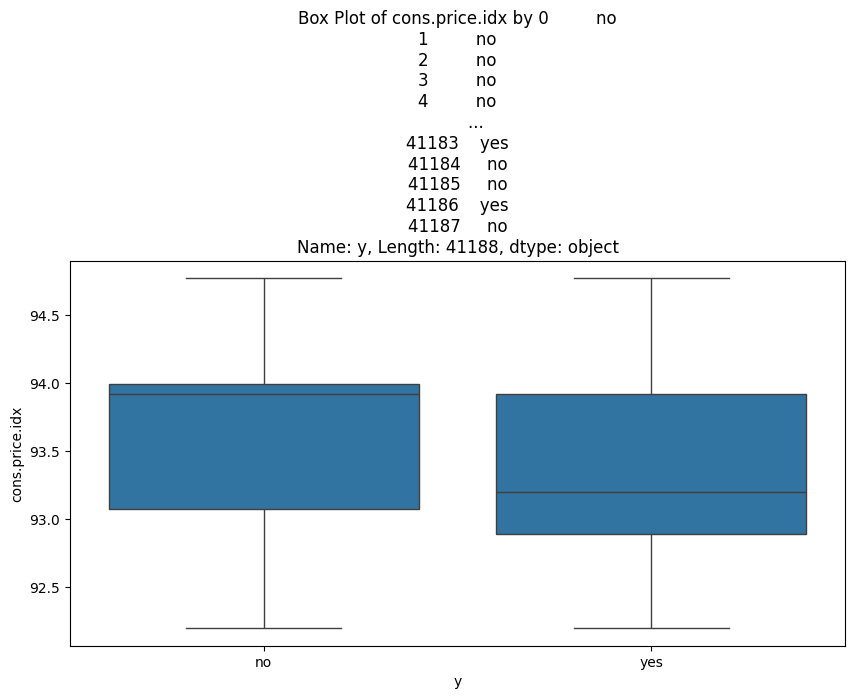

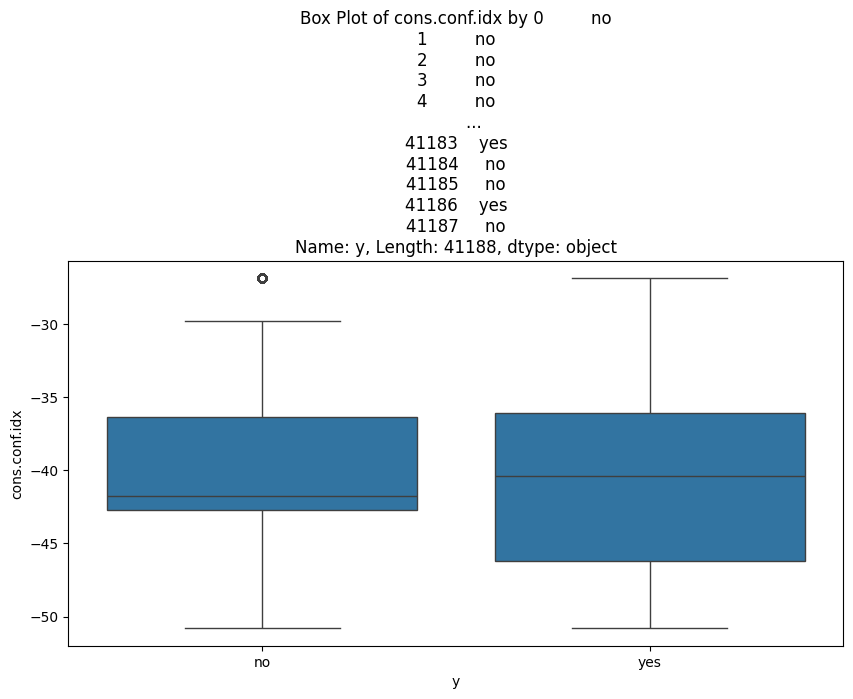

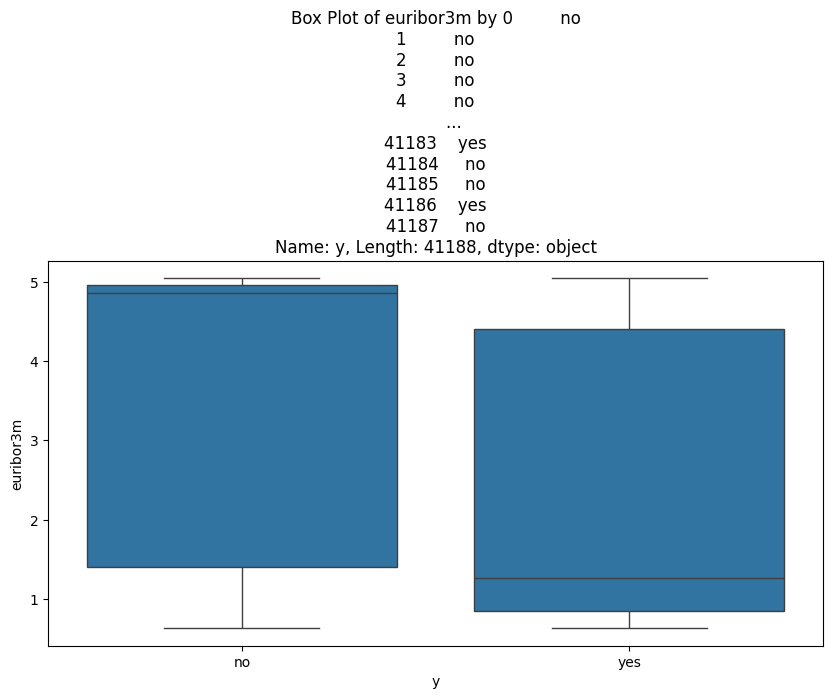

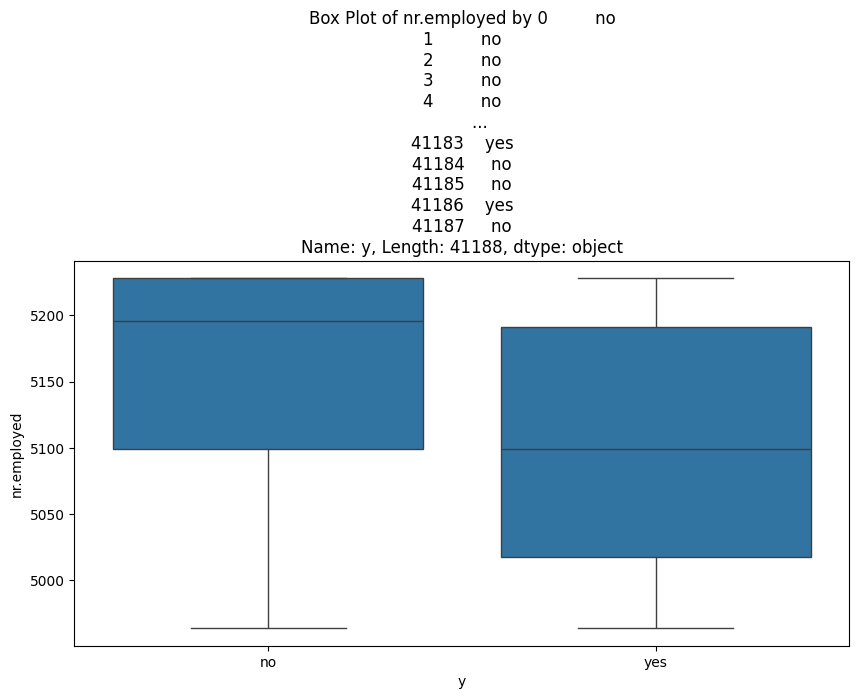

In [67]:
plot_box_plots(data_df_exp, data_df_exp.y)

pdays es practicamente una variable categorica que no tiene ningun impacto en la aceptacion por lo que la eliminamos tambien.


In [68]:
data_df_exp.drop(columns='pdays', inplace=True)

In [71]:
print(f"The number of duplicated records is: {data_df_exp.duplicated().sum()}")

The number of duplicated records is: 13


In [72]:
data_df_exp.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [73]:
data_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [76]:

def convert_categorical_to_numeric(df):
    # Realizar una copia del DataFrame original
    df_copy = df.copy()

    # Identificar las columnas categóricas
    categorical_columns = df_copy.select_dtypes(include=['object', 'category']).columns

    # Convertir las variables categóricas en variables numéricas utilizando pd.factorize
    for col in categorical_columns:
        df_copy[col], _ = pd.factorize(df_copy[col])

    return df_copy



In [77]:
df_numeric = convert_categorical_to_numeric(data_df_exp)

print(df_numeric.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    0        0          0        0        0     0        0      0   
1   57    1        0          1        1        0     0        0      0   
2   37    1        0          1        0        1     0        0      0   
3   40    2        0          2        0        0     0        0      0   
4   56    1        0          1        0        0     1        0      0   

   duration  campaign  previous  poutcome  emp.var.rate  cons.price.idx  \
0       261         1         0         0           1.1          93.994   
1       149         1         0         0           1.1          93.994   
2       226         1         0         0           1.1          93.994   
3       151         1         0         0           1.1          93.994   
4       307         1         0         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  
0          -36.4      4.857       5191.0  0  
1     

In [78]:

def plot_correlation_heatmap(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()



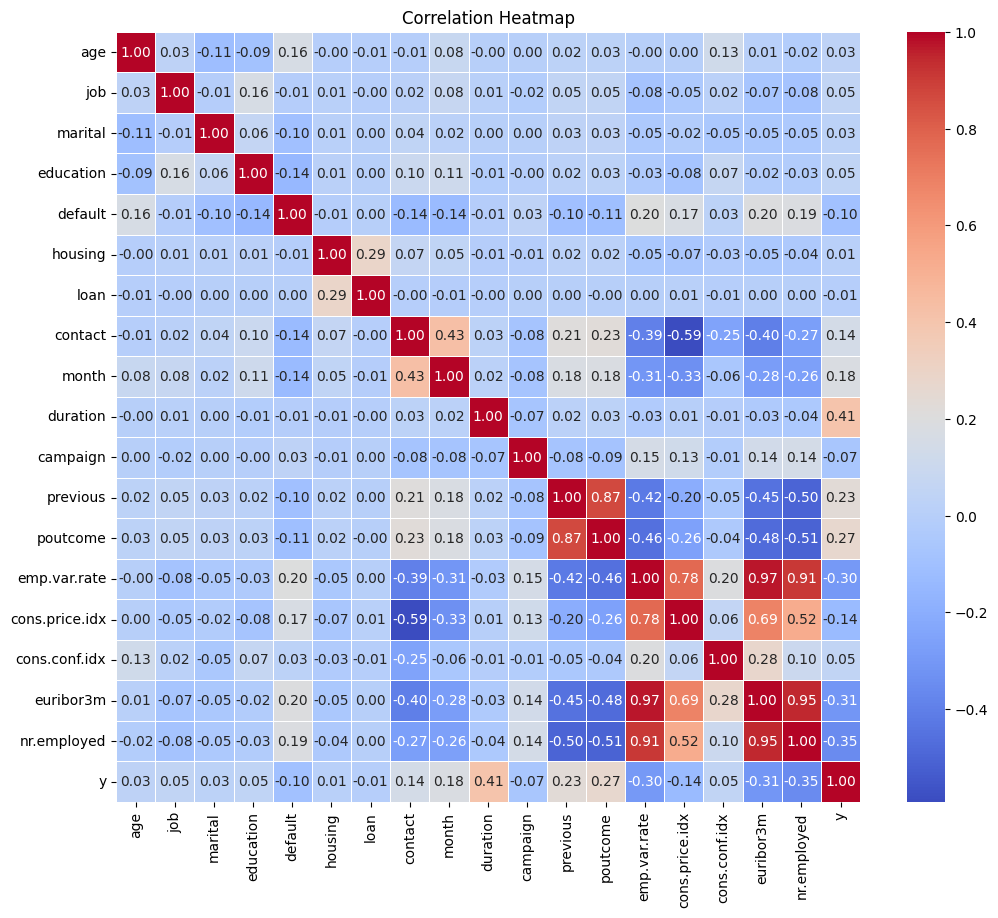

In [79]:

plot_correlation_heatmap(df_numeric)

In [80]:
data_df_exp.isnull().sum().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
duration          0
job               0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [82]:
data_clean = data_df_exp
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [84]:
data_clean_1 = df_numeric
data_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  int64  
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [89]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl (45.9 MB)


In [90]:

from sklearn.preprocessing import MinMaxScaler

scale_variables = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data_clean_1[scale_variables])
df_scaled = pd.DataFrame(scaled_features, index=data_clean_1.index, columns=scale_variables)
df_scaled['y'] = data_clean_1['y']
df_scaled.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.053070,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.030297,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.045954,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.030704,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.062424,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0


In [91]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scaled.drop('y', axis=1)
y = df_scaled['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

select_model = SelectKBest(chi2, k = 8)
select_model.fit(X_train, y_train)

boolean_answer = select_model.get_support()
X_train_selected = pd.DataFrame(select_model.transform(X_train), columns= X_train.columns.values[boolean_answer])
X_test_selected = pd.DataFrame(select_model.transform(X_test), columns= X_test.columns.values[boolean_answer])

X_train_selected.head()


,contact,month,duration,previous,poutcome,emp.var.rate,euribor3m,nr.employed
0,0.0,0.222222,0.019113,0.000000,0.0,1.000000,0.980730,1.000000
1,1.0,0.000000,0.023587,0.000000,0.0,0.333333,0.138291,0.512287
2,1.0,0.000000,0.002643,0.142857,0.5,0.333333,0.163228,0.512287
3,1.0,0.222222,0.019113,0.000000,0.0,1.000000,0.980957,1.000000
4,0.0,0.000000,0.069947,0.000000,0.0,0.937500,0.958059,0.859735


In [93]:
X_train_selected['y']= list(y_train)
X_test_selected['y']= list(y_test)

X_train_selected.to_csv("../data/processed/clean_train.csv", index = False)
X_test_selected.to_csv("../data/processed/clean_test.csv", index = False)

In [95]:
data_1.to_csv("../data/raw/raw_data.csv", index = False)